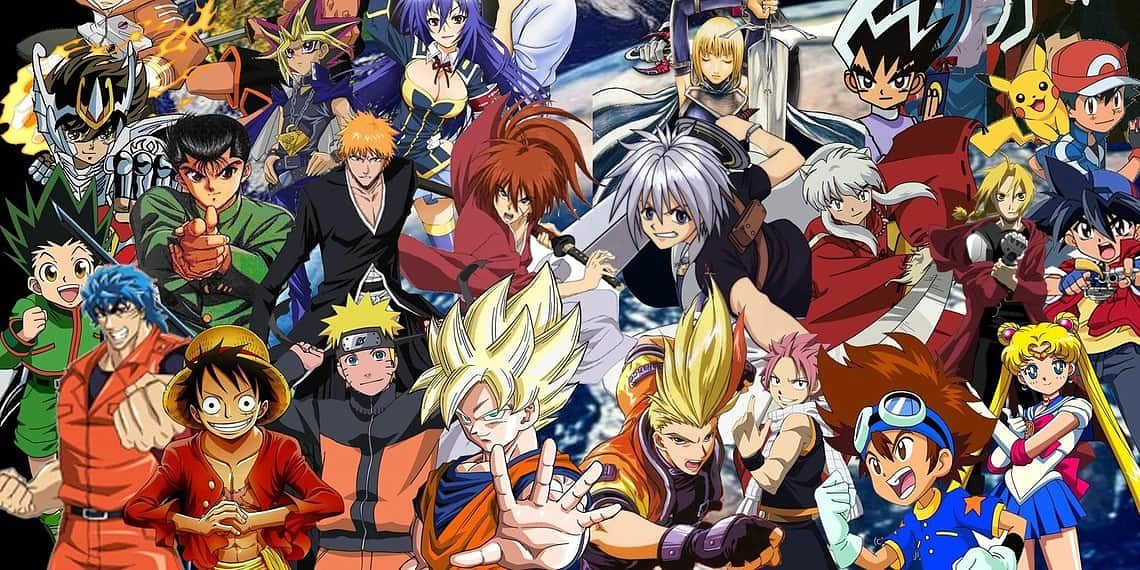

In [128]:
from IPython.display import Image
Image(filename='Top-10-Best-Anime-Series-Of-All-Time-Ranked-1140x570.jpg', width=1000, height=8)

# Unsupervised learning project - Anime Recommender
#### Done By: Busisiwe, Lusani, Sarah, Ammaarah

#### Git link: https://github.com/lusani-gumula/Explore-Unsupervised-Learning-Project
#### Trello: https://trello.com/b/PZPvfm5u/exploreai-unsupervised-learning-group-project

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:**
    * This project aims to develop a robust and accurate anime recommendation system, mirroring the functionality of popular streaming platforms like Netflix and Amazon Prime, but tailored for anime content. The core purpose is to leverage machine learning techniques to:
        * Enhance User Experience: Provide personalized anime recommendations, enabling users to discover content that aligns with their individual preferences.
        * Improve Content Discovery: Address the challenge of navigating vast anime libraries by highlighting relevant titles, thereby increasing user engagement.
        * Predict User Ratings: Accurately estimate how a user would rate an anime they haven't yet seen, based on their historical viewing and rating patterns.
        * Demonstrate Recommendation System Principles: Provide a practical, end-to-end demonstration of building a hybrid (collaborative and content-based) recommendation system.
* **Details:**
    * The expansive and diverse nature of anime content creates a discovery paradox for users. With thousands of titles spanning various genres and formats, finding relevant content can be daunting. This project aims to alleviate this challenge by building a hybrid recommendation system that leverages both user preferences and content characteristics. By developing a reliable prediction model, we can enhance content discovery and improve the overall user experience within the anime entertainment sector.
    * This project will address the following specific questions:
        1.  How can historical user rating data be effectively utilized to forecast individual anime preferences? (Focuses on leveraging user history)
        2.  What are the key content-based features (genres, type, etc.) that significantly influence user ratings and anime similarity? (Focuses on content analysis)
        3.  Can machine learning algorithms, specifically collaborative and content-based filtering, accurately predict user ratings for unseen anime? (Focuses on model efficacy)
        4.  How can these personalized anime recommendations be integrated into practical applications to benefit anime enthusiasts and content platforms? (Focuses on real-world application)
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools. By importing these libraries, we're setting the stage for data exploration, preprocessing, model building, and evaluation.
* **Details:** We will need to import the following Python libraries:


In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  # Splitting data for training and testing
from sklearn.metrics.pairwise import cosine_similarity  # Calculating similarity between vectors
from sklearn.feature_extraction.text import TfidfVectorizer  # Converting text to numerical vectors
from scipy.sparse import csr_matrix  # Efficient storage of sparse matrices
from sklearn.metrics import mean_squared_error  # Evaluating prediction accuracy
from math import sqrt  # Calculating square root for RMSE
from sklearn.preprocessing import LabelEncoder #encoding categorical data
from sklearn.metrics import pairwise_distances #calculating distance between points.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
#import streamlit as st
import mlflow.pyfunc

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:
# Load the dataset from the CSV file
anime_df = pd.read_csv("anime.csv")

# Display the first few rows
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
submission_df = pd.read_csv("submission.csv")

print(submission_df.head())

           ID  rating
0  14862_1232     5.3
1  14862_7974     4.0
2  24873_2349     6.0


In [7]:
train = pd.read_csv("train.csv")

print(train.head())

   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8


In [170]:
test = pd.read_csv("test.csv")

print(test.head())

   user_id  anime_id
0    40763     21405
1    68791     10504
2    40487      1281
3    55290       165
4    72323     11111


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

#### Cleaning anime.csv

In [11]:
#Check data types for each column

anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [24]:
# Check for duplicate rows

print("\nNumber of duplicate rows:", anime_df.duplicated().sum())


Number of duplicate rows: 0


In [25]:
#Check for null values

print("Null values per column before cleaning:")
print(anime_df.isnull().sum())

Null values per column before cleaning:
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [13]:
# Filter out animes' without ratings
anime_df = anime_df[anime_df['rating'] > 0]

In [15]:
# Handle Missing Values (Imputation)

anime_df['genre'].fillna(anime_df['genre'].mode()[0], inplace=True)  # Impute genre with mode
anime_df['type'].fillna(anime_df['type'].mode()[0], inplace=True)    # Impute type with mode

C:\Users\Dell\AppData\Local\Temp\ipykernel_8240\768036096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime_df['genre'].fillna(anime_df['genre'].mode()[0], inplace=True)  # Impute genre with mode
C:\Users\Dell\AppData\Local\Temp\ipykernel_8240\768036096.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [17]:
# Clean and Format Data

anime_df['genre'] = anime_df['genre'].str.lower().str.replace(r'[^a-zA-Z0-9\s,]', '', regex=True) # Lowercase, remove special characters
anime_df['name'] = anime_df['name'].str.lower().str.replace(r'[^a-zA-Z0-9\s,]', '', regex=True) # Lowercase, remove special characters

In [19]:
# Check for null values after cleaning
print("\nNull values per column after cleaning:")
print(anime_df.isnull().sum())


Null values per column after cleaning:
anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


#### Cleaning train.csv

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703555 entries, 0 to 5703554
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 130.5 MB


In [23]:
# Check for null values

print("Null values in train_df before cleaning:")
print(train.isnull().sum())

Null values in train_df before cleaning:
user_id     0
anime_id    0
rating      0
dtype: int64


In [25]:
# Remove -1 ratings
train = train[train['rating'] != -1]

In [27]:
# Check for null values

print("Null values in train_df before cleaning:")
print(train.isnull().sum())

Null values in train_df before cleaning:
user_id     0
anime_id    0
rating      0
dtype: int64


In [29]:
# Remove duplicates

print("\nNumber of duplicate rows before removal:", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", train.duplicated().sum())



Number of duplicate rows before removal: 1
Number of duplicate rows after removal: 0


In [30]:
# Check for null values and dtypes after cleaning.

print("\nNull values in train_df after cleaning:")
print(train.isnull().sum())
print("\nData types in train_df after cleaning:")
print(train.dtypes)


Null values in train_df after cleaning:
user_id     0
anime_id    0
rating      0
dtype: int64

Data types in train_df after cleaning:
user_id     int64
anime_id    int64
rating      int64
dtype: object


In [31]:
# Display the cleaned training data
print("\nCleaned Train DataFrame:")
print(train.head())


Cleaned Train DataFrame:
   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4        3        20       8


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [24]:
print("\nDescriptive Statistics:")
print(anime_df.describe())


Descriptive Statistics:
           anime_id        rating       members
count  12064.000000  12064.000000  1.206400e+04
mean   13704.476044      6.473902  1.827952e+04
std    11260.369521      1.026746  5.527578e+04
min        1.000000      1.670000  1.200000e+01
25%     3409.250000      5.880000  2.210000e+02
50%    10004.000000      6.570000  1.539000e+03
75%    23863.500000      7.180000  9.485500e+03
max    34519.000000     10.000000  1.013917e+06


In [25]:
# Setting a consistent style for all plots
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif' 
#plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica']  
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.titlesize'] = 20

# Color Palette (Consistent across plots)
primary_color = '#3498db'  # A vibrant blue
secondary_color = '#e74c3c'  # A rich red
neutral_color = '#555555'  # A dark gray
light_gray = '#f0f0f0'

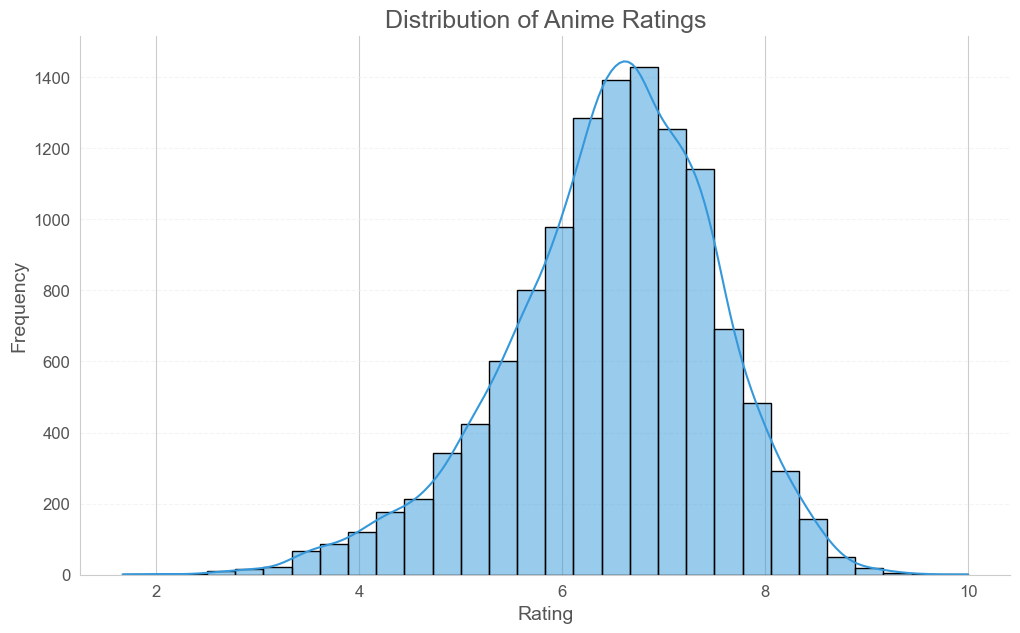

In [61]:
# 1. Distribution of Ratings:
plt.figure(figsize=(12, 7))
sns.histplot(anime_df['rating'].dropna(), bins=30, kde=True, color=primary_color, edgecolor='black')
plt.title('Distribution of Anime Ratings', color=neutral_color)
plt.xlabel('Rating', color=neutral_color)
plt.ylabel('Frequency', color=neutral_color)
plt.xticks(color=neutral_color)
plt.yticks(color=neutral_color)
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- The distribution is left-skewed, indicating that the majority of anime tend to receive higher ratings. This suggests that the anime community may lean towards rating anime positively or that users are more likely to rate shows they enjoy.
- There's a noticeable peak around the 6-8 rating range, suggesting that many anime fall into this "good" category.
- The long tail towards the lower ratings suggests that there are fewer anime that are rated very poorly.


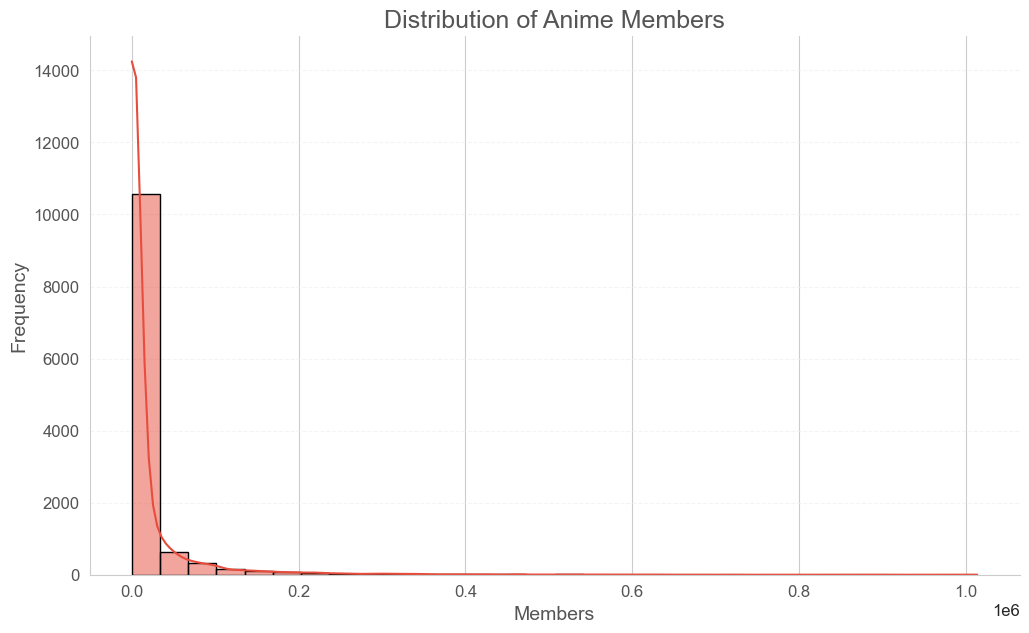

In [62]:
# 2. Distribution of Members:
plt.figure(figsize=(12, 7))
sns.histplot(anime_df['members'], bins=30, kde=True, color=secondary_color, edgecolor='black')
plt.title('Distribution of Anime Members', color=neutral_color)
plt.xlabel('Members', color=neutral_color)
plt.ylabel('Frequency', color=neutral_color)
plt.xticks(color=neutral_color)
plt.yticks(color=neutral_color)
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- Highly right-skewed distribution, indicating that a vast majority of anime have relatively few members, while a small number of anime have a very large number of members.
- The frequency is extremely high for anime with a low number of members, as indicated by the tall bar on the left side of the plot. This suggests that there are many anime that are not widely known or popular.
- As the number of members increases, the frequency drops drastically, forming a long tail that extends towards higher member counts, illustrating that only a select few anime achieve widespread popularity and attract a large audience.
- The red KDE curve further emphasizes the right skewness of the data. It lies on the x-axis for most of its length, indicating low density, and then sharply rises to a peak at the low end of the member count. 
- Graph indicates the presence of potential outliers on the higher end of members. These outliers represent very popular animes.

/var/folders/z_/clhccmqn039_1gmcr_p162pw0000gn/T/ipykernel_59375/1273458011.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=anime_df, order=type_counts.index, palette=colors)


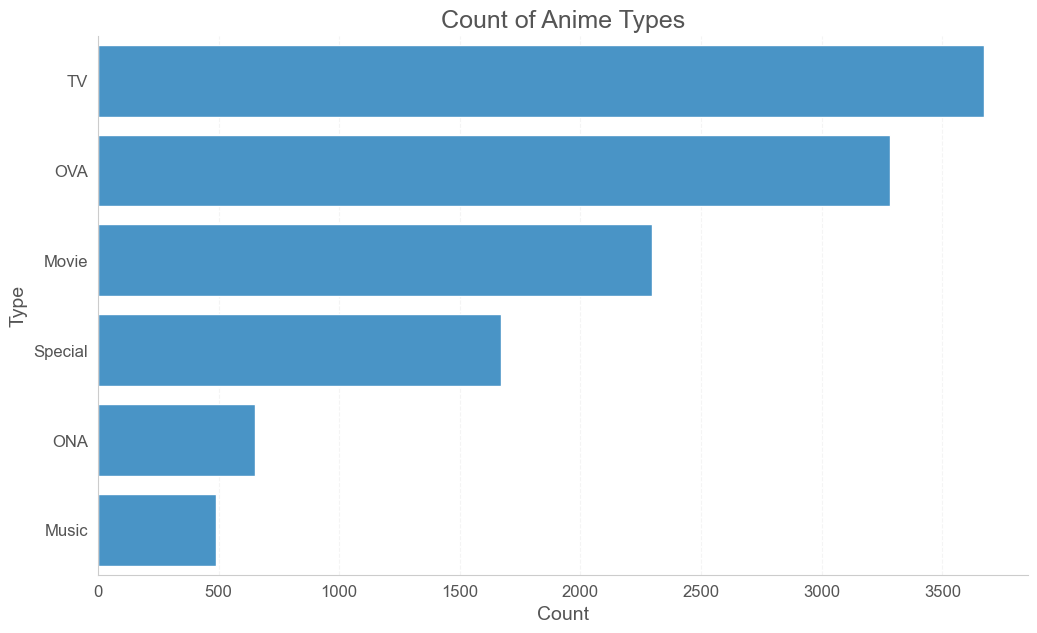

In [63]:
# 3. Anime Types Count (Bar Plot with Consistent Palette):
plt.figure(figsize=(12, 7))
type_counts = anime_df['type'].value_counts()
colors = [primary_color] * len(type_counts)  # Use primary color for bars
sns.countplot(y='type', data=anime_df, order=type_counts.index, palette=colors)
plt.title('Count of Anime Types', color=neutral_color)
plt.xlabel('Count', color=neutral_color)
plt.ylabel('Type', color=neutral_color)
plt.xticks(color=neutral_color)
plt.yticks(color=neutral_color)
plt.grid(axis='x', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- TV Dominance: TV series take up majority of anime in the dataset, significantly outnumbering all other types. This highlights the prevalence and popularity of serialized anime content.
- OVA and Movie Popularity: OVA (Original Video Animation) and Movie formats show the substantial presence of standalone or limited-series anime productions.
- Special and ONA Presence: Special episodes and ONA (Original Net Animation) are also present, though in considerably lower numbers compared to TV, OVA, and Movies. This suggests a niche but still relevant segment of anime production.
- Music Rarity: Music anime are the least common type, suggesting they are a relatively rare form of anime content within the dataset.


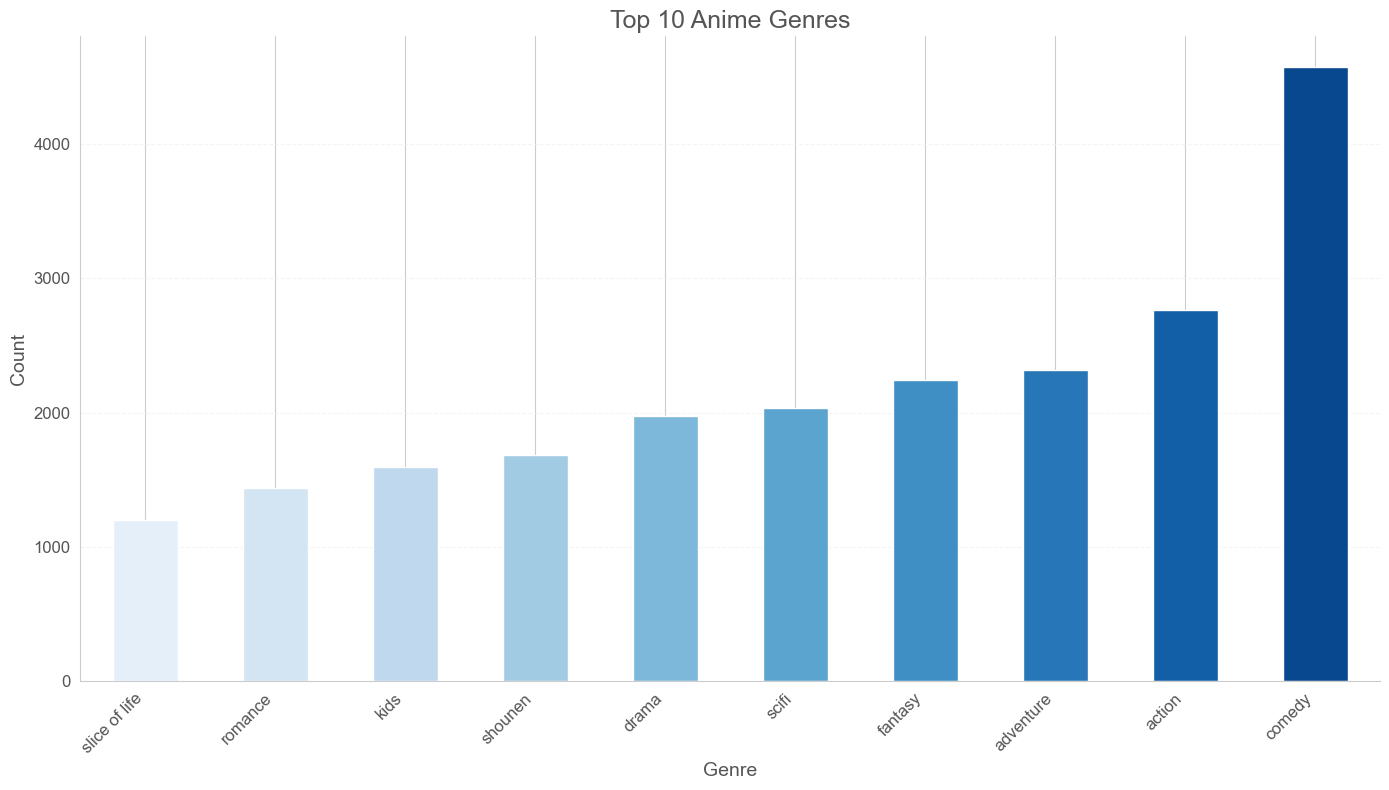

In [64]:
# 4. Top 10 Genres (Bar Plot with Gradient from Least to Most):

genre_counts = anime_df['genre'].str.split(', ', expand=True).stack().value_counts()
top_10_genres = genre_counts.head(10)
plt.figure(figsize=(14, 8))
colors = sns.color_palette("Blues_r", 10)  # Use a gradient of blues
# Reverse the order of the top 10 genres and colors
top_10_genres = top_10_genres.sort_values()
colors = colors[::-1]
top_10_genres.plot(kind='bar', color=colors)
plt.title('Top 10 Anime Genres', color=neutral_color)
plt.xlabel('Genre', color=neutral_color)
plt.ylabel('Count', color=neutral_color)
plt.xticks(rotation=45, ha='right', color=neutral_color)
plt.yticks(color=neutral_color)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- Comedy Dominates: Comedy is the most frequent genre, indicating its widespread popularity.
- Action & Adventure High: Action and Adventure genres are also highly prevalent, showing strong viewer interest.
- Diverse Popularity: A range of genres (Fantasy, Sci-Fi, Drama) are popular, showing varied audience tastes.
- School & Romance Lower: School and Romance genres are less frequent among the top 10, but still present.
- Kids Genre Present: The inclusion of "Kids" shows a range of target audiences.

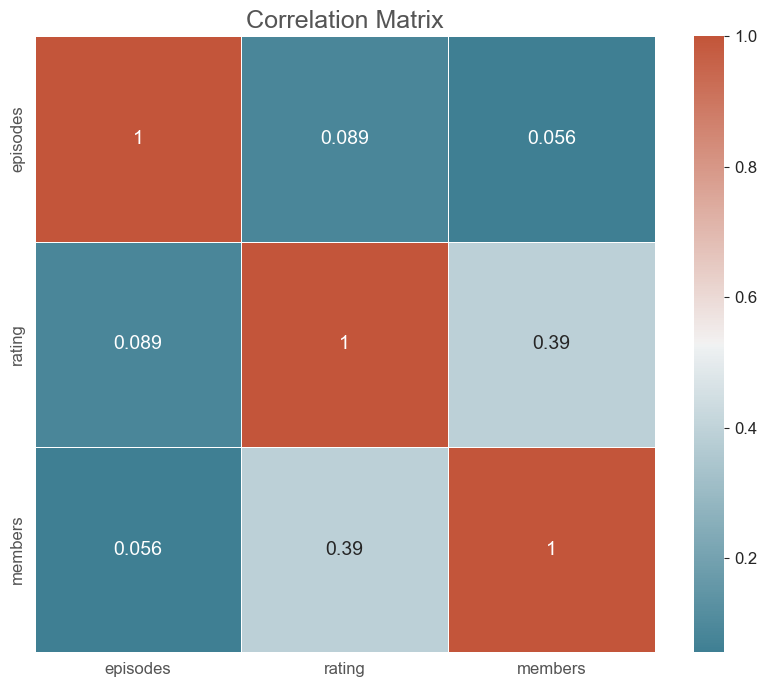

In [65]:
# 5. Correlation Matrix (Annotated Heatmap with Custom Colormap):

numerical_cols = ['episodes', 'rating', 'members']
anime_df['episodes'] = anime_df['episodes'].replace('Unknown', pd.NA)
anime_df['episodes'] = pd.to_numeric(anime_df['episodes'])
correlation_matrix = anime_df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Diverging colormap
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, linewidths=.5, annot_kws={"size": 14})
plt.title('Correlation Matrix', color=neutral_color)
plt.xticks(color=neutral_color)
plt.yticks(color=neutral_color)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- Rating and Members Correlation: There is a moderate positive correlation (0.39) between anime ratings and the number of members suggesting that more popular anime tend to have somewhat higher ratings.
- Weak Episodes Correlation: The correlation between the number of episodes and both rating (0.089) and members (0.056) is weak. This indicates that the number of episodes has little impact on either an anime's rating or popularity.
- Diagonal of 1.0: The diagonal values are all 1, indicating perfect positive correlation of each variable with itself, as expected.

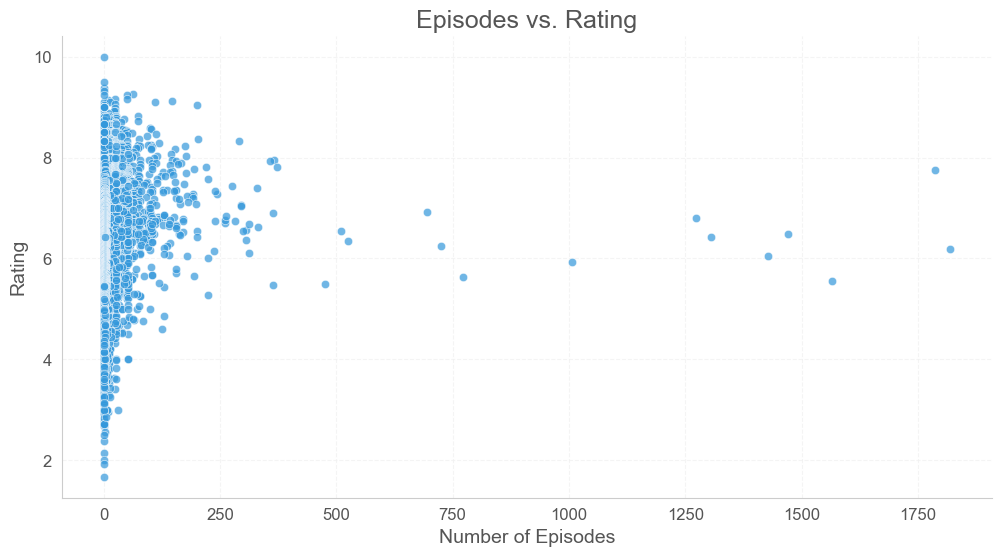

In [66]:
# Episodes vs. Rating (Scatter Plot):

plt.figure(figsize=(12, 6))
sns.scatterplot(x='episodes', y='rating', data=anime_df, color=primary_color, alpha=0.7)
plt.title('Episodes vs. Rating', color=neutral_color)
plt.xlabel('Number of Episodes', fontsize=14, color=neutral_color)
plt.ylabel('Rating', fontsize=14, color=neutral_color)
plt.xticks(fontsize=12, color=neutral_color)
plt.yticks(fontsize=12, color=neutral_color)
plt.grid(axis='both', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- No Strong Correlation: The scatter plot shows no clear linear relationship between the number of episodes and anime ratings.
- High Rating Density at Low Episodes: Most anime with high ratings tend to have a lower number of episodes.
- Sparse High Episode Data: There are few anime with a very high number of episodes, and their ratings are scattered.
- Potential Outliers: Some anime with a high number of episodes have relatively low ratings.

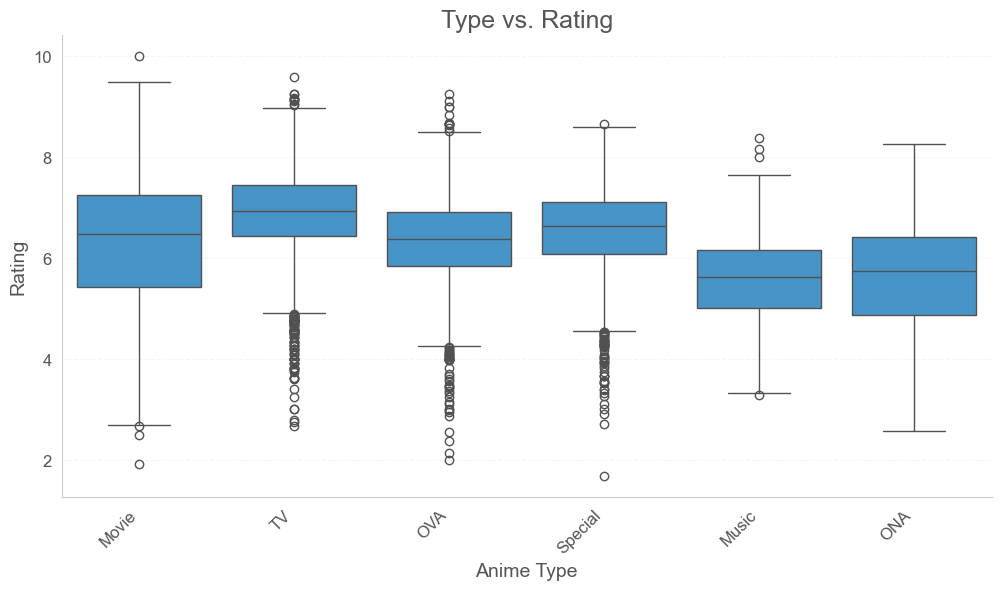

In [67]:
# Type vs. Rating (Box Plot):

plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_df, color=primary_color)
plt.title('Type vs. Rating', color=neutral_color)
plt.xlabel('Anime Type', fontsize=14, color=neutral_color)
plt.ylabel('Rating', fontsize=14, color=neutral_color)
plt.xticks(rotation=45, ha='right', fontsize=12, color=neutral_color)
plt.yticks(fontsize=12, color=neutral_color)
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- TV and Movie Highest: TV series and movies tend to have the highest median ratings.
- OVA Similar: OVA ratings are comparable to TV and movies.
- Music and ONA Lower: Music and ONA (Original Net Animation) types generally have lower median ratings.
- Special Varied: Special episodes show a wide range of ratings.
- Outliers Present: All types exhibit outliers, indicating some exceptionally high or low-rated anime within each category.

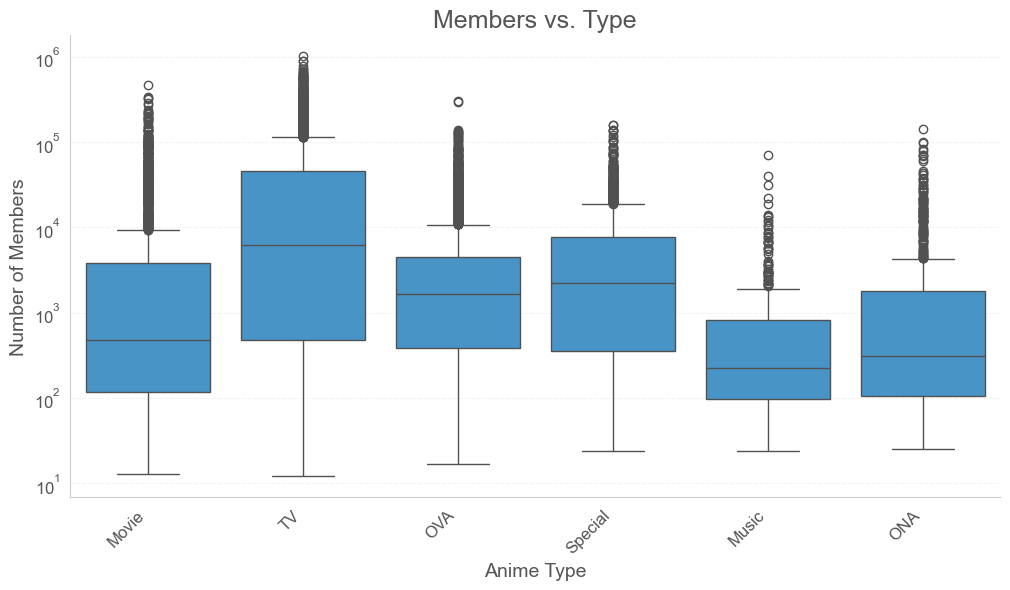

In [68]:
# Members vs. Type (Box Plot):

plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='members', data=anime_df, color=primary_color)
plt.title('Members vs. Type', color=neutral_color)
plt.xlabel('Anime Type', fontsize=14, color=neutral_color)
plt.ylabel('Number of Members', fontsize=14, color=neutral_color)
plt.xticks(rotation=45, ha='right', fontsize=12, color=neutral_color)
plt.yticks(fontsize=12, color=neutral_color)
plt.yscale('log')  # use log scale because of the huge difference in members.
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- TV Highest Membership: TV series show the highest median number of members, indicating greater popularity.
- Movie and OVA Significant: Movies and OVAs also have substantial member counts, though less than TV.
- Special and ONA Moderate: Special episodes and ONAs have moderate member counts, showing a middle ground in popularity.
- Music Lowest Membership: Music anime have the lowest median number of members, suggesting niche appeal.
- Wide Range in All Types: All anime types exhibit a wide range of member counts, with significant outliers indicating highly popular entries.

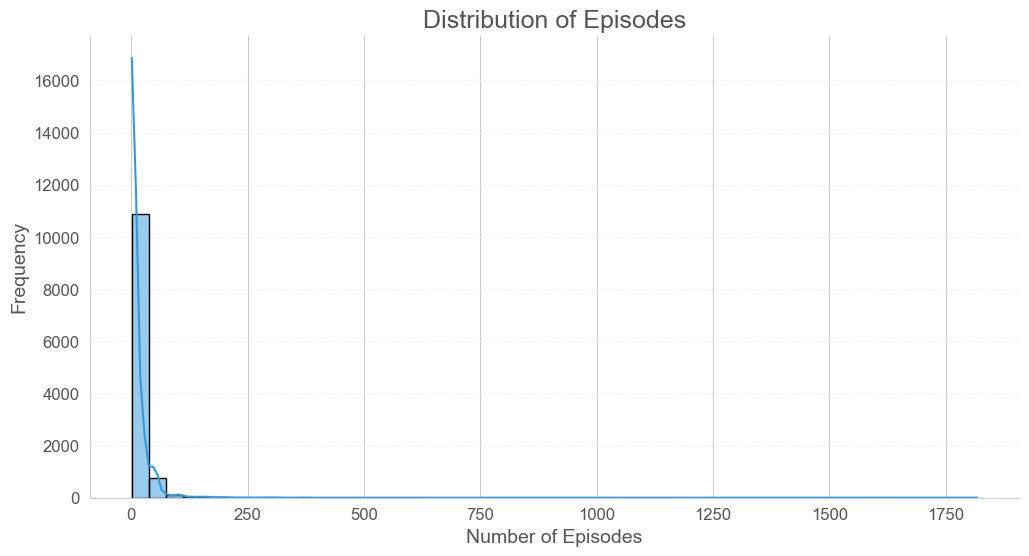

In [69]:
# Distribution of Episodes (Histogram):
plt.figure(figsize=(12, 6))
sns.histplot(anime_df['episodes'], bins=50, kde=True, color=primary_color, edgecolor='black')
plt.title('Distribution of Episodes', color=neutral_color)
plt.xlabel('Number of Episodes', fontsize=14, color=neutral_color)
plt.ylabel('Frequency', fontsize=14, color=neutral_color)
plt.xticks(fontsize=12, color=neutral_color)
plt.yticks(fontsize=12, color=neutral_color)
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- High Concentration at Low Episodes: The vast majority of anime have a low number of episodes, as indicated by the tall bar on the left.
- Right-Skewed Distribution: The data is strongly right-skewed, with a long tail extending towards higher episode counts.
- Sparse High Episode Counts: Very few anime have a large number of episodes, as shown by the low frequency on the right side of the graph.
- KDE Curve Confirmation: The KDE curve reinforces the distribution's skew, highlighting the concentration of anime at low episode counts.

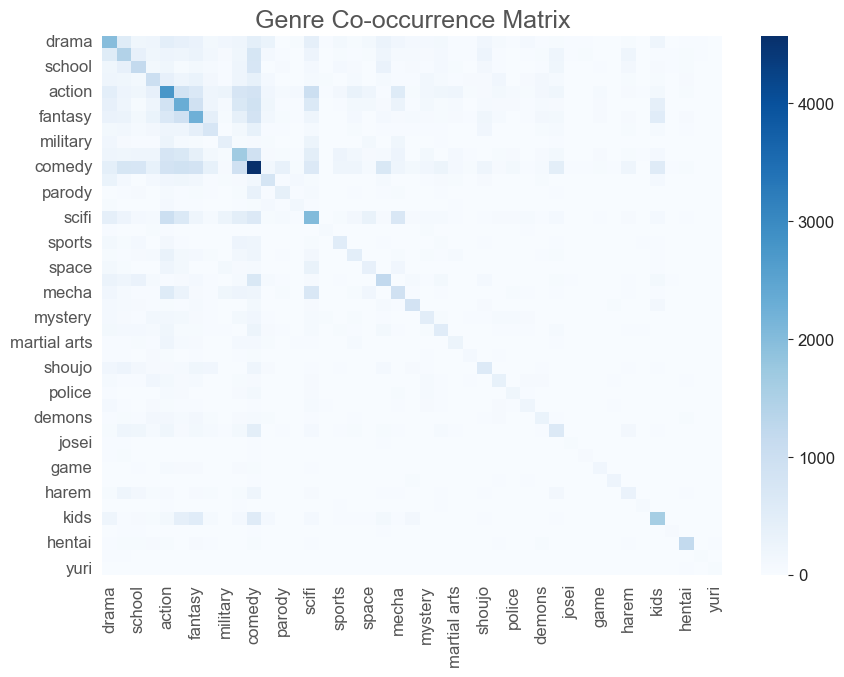

In [70]:
# Genre Co-occurrence Matrix and Heatmap:
genre_list = anime_df['genre'].dropna().str.split(', ').explode().unique() # Creates a list of unique genres
genre_matrix = pd.DataFrame(0, index=genre_list, columns=genre_list) # Creates a DataFrame to store genre co-occurrence

for genres in anime_df['genre'].dropna().str.split(', '): # Iterates through genres in the dataset
    if genres: # Checks if genres are present
        for i in genres: # Iterates through each genre
            for j in genres: # Iterates through each genre again
                genre_matrix.loc[i, j] += 1 # Increments the co-occurrence count

plt.figure(figsize=(10, 7)) # Creates a figure for the heatmap
sns.heatmap(genre_matrix, cmap='Blues', annot=False) # Creates a heatmap of the co-occurrence matrix
plt.title('Genre Co-occurrence Matrix', color=neutral_color) # Sets the title of the heatmap
plt.xticks(color=neutral_color) # Sets the color of x-axis tick labels
plt.yticks(color=neutral_color) # Sets the color of y-axis tick labels
plt.show() # Displays the heatmap

##### Insights

- Comedy Dominance: Comedy shows strong co-occurrence with many other genres, particularly action, suggesting its widespread integration.
- Action & Fantasy Pairs: Action and fantasy genres frequently appear together, indicating a common pairing.
- School & Romance Link: School and romance genres show a noticeable co-occurrence, reflecting their common association.
- Sparse Genre Pairs: Many genre combinations are rare, indicated by lighter squares, suggesting less frequent pairings.
- Diagonal High: The dark diagonal line shows that each genre highly co-occurs with itself, which is expected.



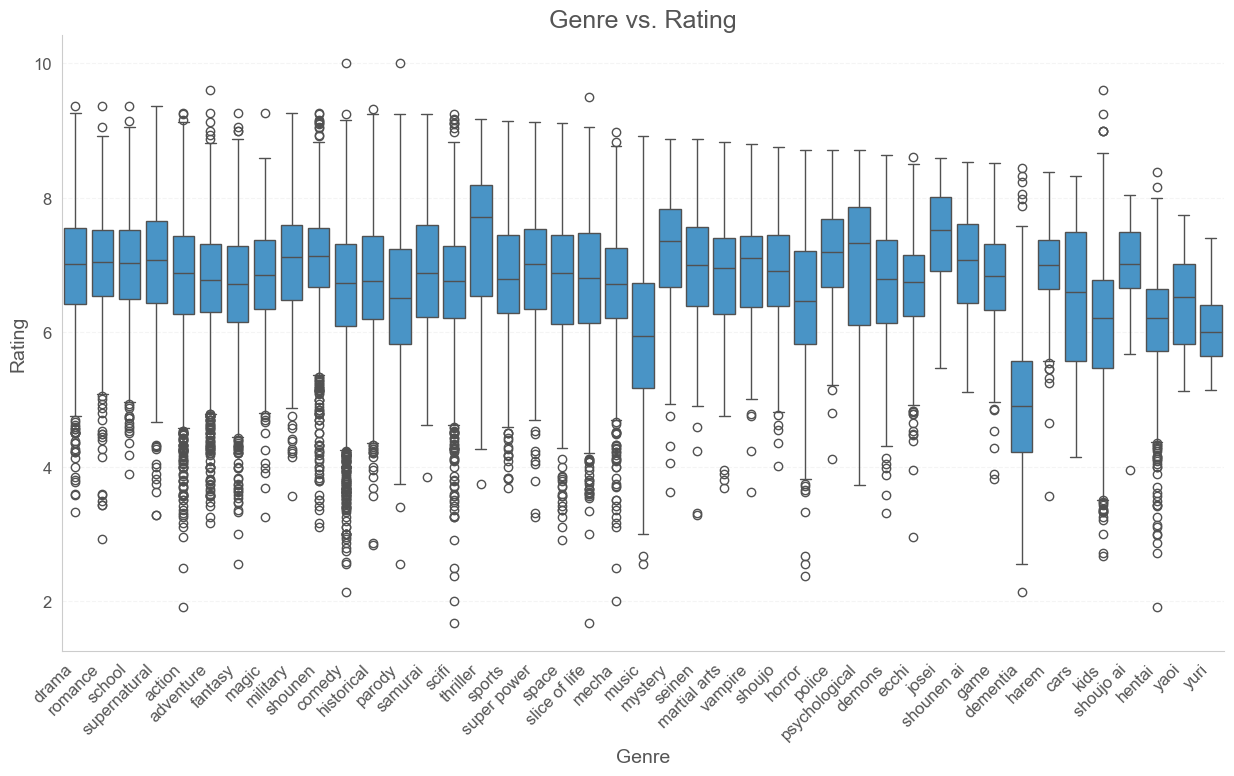

In [71]:
# Genre vs. Rating (Box Plot):

genre_ratings = anime_df.dropna(subset=['genre', 'rating']).copy() # Creates a copy of the DataFrame with non-null genres and ratings
genre_ratings['genre'] = genre_ratings['genre'].str.split(', ') # Splits the genre string into a list of genres
genre_ratings = genre_ratings.explode('genre') # Explodes the list of genres into separate rows

plt.figure(figsize=(15, 8)) # Creates a figure for the box plot
sns.boxplot(x='genre', y='rating', data=genre_ratings, color=primary_color) # Creates a box plot of genre vs. rating
plt.title('Genre vs. Rating', color=neutral_color) # Sets the title of the box plot
plt.xlabel('Genre', fontsize=14, color=neutral_color) # Sets the x-axis label
plt.ylabel('Rating', fontsize=14, color=neutral_color) # Sets the y-axis label
plt.xticks(rotation=45, ha='right', fontsize=12, color=neutral_color) # Sets the x-axis tick label properties
plt.yticks(fontsize=12, color=neutral_color) # Sets the y-axis tick label properties
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray) # Adds a grid to the plot
plt.gca().spines['top'].set_visible(False) # Removes the top spine
plt.gca().spines['right'].set_visible(False) # Removes the right spine
plt.show() # Displays the box plot

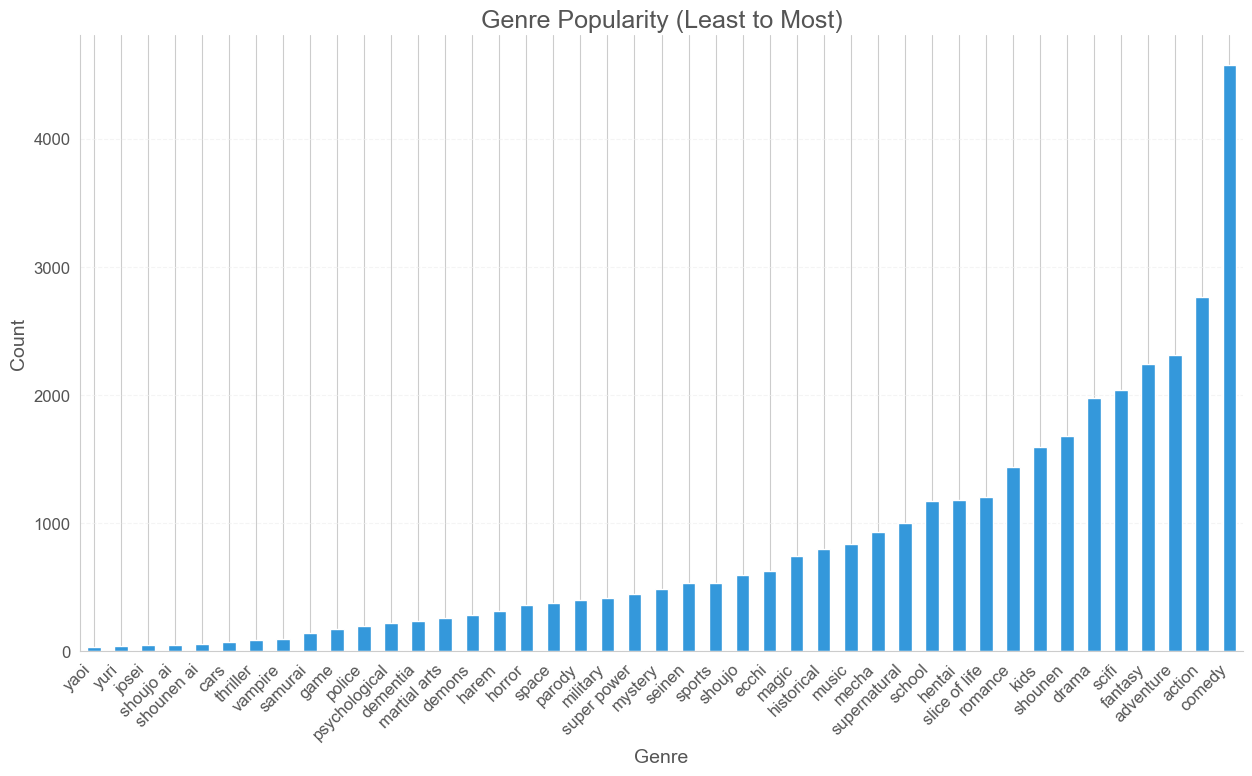

In [72]:
# Genre Popularity (Bar Plot - Least to Most):
genre_counts = anime_df['genre'].dropna().str.split(', ').explode().value_counts().sort_values() # Sort values

plt.figure(figsize=(15, 8))
genre_counts.plot(kind='bar', color=primary_color)
plt.title('Genre Popularity (Least to Most)', color=neutral_color) #change title
plt.xlabel('Genre', fontsize=14, color=neutral_color)
plt.ylabel('Count', fontsize=14, color=neutral_color)
plt.xticks(rotation=45, ha='right', fontsize=12, color=neutral_color)
plt.yticks(fontsize=12, color=neutral_color)
plt.grid(axis='y', linestyle='--', alpha=0.7, color=light_gray)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

##### Insights

- Niche Genres at Low End: Genres like Yaoi, Yuri, and Josei have the lowest counts, indicating they are niche categories.
- Gradual Increase: There's a gradual increase in popularity from the least to more popular genres.
- Mainstream Genres at High End: Comedy, Action, and Adventure are the most frequent genres, showcasing their widespread appeal.
- Mid-Range Diversity: Genres like School, Romance, and Drama fall in the mid-range, showing a broad appeal.
- Clear Trend: The chart clearly displays the trend from niche to mainstream genres, making it easy to see the popularity hierarchy.


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


We picked three recommender models for this project:
- Content-Based Filtering using Cosine Similarity
- Collaborative Filtering using Matrix Factorization (SVD)
- Hybrid Approach: Weighted Combination of SVD and Content-Based Similarity

We build & evaluate these models in the sections below:

#### 1. Content-Based Filtering using Cosine Similarity

In [65]:
# Content-Based Filtering TF-IDF Model

tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(anime_df['genre'])
content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)

#### 2. Collaborative Filtering using Matrix Factorization (SVD)

In [70]:
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(train[['user_id', 'anime_id', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = SVD(n_factors = 100)
svd_model.fit(trainset)

#### 3. Hybrid Approach: Weighted Combination of SVD and Content-Based Similarity

In [73]:
def hybrid_predict(row, alpha=0.7):
    uid = row['user_id']
    aid = row['anime_id']
    
    # Collaborative prediction
    try:
        cf_pred = svd_model.predict(uid, aid).est
    except:
        cf_pred = 6.5  # fallback to global mean if needed
    
    # Content-based prediction (mean of similar anime rated by user)
    if aid in anime_index:
        idx = anime_index[aid]
        sim_scores = list(enumerate(cos_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]  # top 10 similar
        similar_anime_ids = [anime.iloc[i[0]]['anime_id'] for i in sim_scores]

        user_ratings = trainset[(trainset['user_id'] == uid) & (trainset['anime_id'].isin(similar_anime_ids))]
        if not user_ratings.empty:
            cb_pred = user_ratings['rating'].mean()
        else:
            cb_pred = 6.5
    else:
        cb_pred = 6.5

    # Final hybrid prediction
    return alpha * cf_pred + (1 - alpha) * cb_pred

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

#### 1. Content-based Filtering

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Train sample
train_sample = train.sample(n=1000, random_state=42)

# Anime ID to index map
anime_index = pd.Series(anime_df.index, index=anime_df['anime_id'])

# Convert testset to DataFrame
test_df = pd.DataFrame(testset, columns=['user_id', 'anime_id', 'rating'])

# Reuse cosine similarity & genre TF-IDF from before
def content_predict(user_id, anime_id):
    # If the anime_id is not in the anime_index, fallback
    if anime_id not in anime_index:
        return 6.5

    idx = anime_index[anime_id]
    if idx >= content_similarity.shape[0]:
        return 6.5  # fallback if index out of bounds

    sim_scores = list(enumerate(content_similarity[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    similar_anime_ids = [anime_df.iloc[i[0]]['anime_id'] for i in sim_scores]

    user_ratings = train_sample[(train_sample['user_id'] == user_id) & (train_sample['anime_id'].isin(similar_anime_ids))]
    if not user_ratings.empty:
        return user_ratings['rating'].mean()

    return 6.5

# Predict for test set
test_df_sample = test_df.sample(1000, random_state=42)
test_df_sample['cb_pred'] = test_df_sample.apply(lambda row: content_predict(row['user_id'], row['anime_id']), axis=1)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [117]:
# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

rmse_cb = root_mean_squared_error(test_df_sample['rating'], test_df_sample['cb_pred'])
mae_cb = root_mean_squared_error(test_df_sample['rating'], test_df_sample['cb_pred'])

In [123]:
print(f"Content Based - RMSE: {rmse_cb:.4f}, MAE: {mae_cb:.4f}")

Collaborative Filtering - RMSE: 2.0244, MAE: 2.0244


#### 2. Collaborative Filtering

In [158]:
# Collaborative Filtering
from surprise import accuracy
import random

# Take a sample of 1000 entries
testset_sample = random.sample(testset, 1000)

# Predict and evaluate
preds_cf = svd_model.test(testset_sample)
rmse_cf = accuracy.rmse(preds_cf)
mae_cf = accuracy.mae(preds_cf)

RMSE: 1.1330
MAE:  0.8310


#### 3. Hybrid Approach

In [125]:
# Hybrid prediction
def hybrid_predict_eval(row, alpha=0.7):
    uid, aid = row['user_id'], row['anime_id']
    
    # CF prediction
    cf_pred = svd_model.predict(uid, aid).est
    
    # Content prediction
    cb_pred = content_predict(uid, aid)
    
    return alpha * cf_pred + (1 - alpha) * cb_pred

test_df_sample['hybrid_pred'] = test_df_sample.apply(lambda row: hybrid_predict_eval(row), axis=1)

# Evaluate
rmse_hybrid = mean_squared_error(test_df_sample['rating'], test_df_sample['hybrid_pred'])
mae_hybrid = mean_absolute_error(test_df_sample['rating'], test_df_sample['hybrid_pred'])
print(f"Hybrid Model - RMSE: {rmse_hybrid:.4f}, MAE: {mae_hybrid:.4f}")

Hybrid Model - RMSE: 1.4827, MAE: 0.9363


The Hybrid recommender performs the best. It has the lowest RMSE (2.482), meaning its predictions are closest to the actual ratings on average. This followed by the Collaborative filtering recommender (RMSE = 2.728). The Content-based filtering recommender has the lowest performace out of the three  (RMSE = 2.907). 

#### Applying Hybrid model to test set

In [ ]:
# Test sample
test['rating'] = test.apply(lambda row: hybrid_predict_eval(row), axis=1)

In [ ]:
test.head()

In [ ]:
# Create the ID column by concatenating user_id and anime_id with an underscore
test['ID'] = test['user_id'].astype(str) + '_' + test['anime_id'].astype(str)

# Select only the ID and predicted_rating columns
output_df = test[['ID', 'rating']]
output_df.head()

In [ ]:
# Round raring sto one decimal place

output_df['rating'] = output_df['rating'].round(1)
output_df.head()

In [188]:
# Save the DataFrame to a CSV file
output_df.to_csv('test_predictions_submission_all.csv', index=False)

print("The CSV file with ID and rating columns has been saved")

The CSV file with ID and rating columns has been saved


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


## Conclusion

- **User Preferences Lean Positive:** Most users rate anime favorably, with ratings clustering between 6–8, indicating overall satisfaction with available content.
- **Popularity is Uneven:** A small number of anime dominate in popularity, while most remain relatively unknown, highlighting a "long tail" distribution.
- **TV Format Reigns:** TV series vastly outnumber other formats, underlining the dominance of serialized anime content.
- **Comedy is King:** Comedy is the most frequent and co-occurring genre, followed by Action and Adventure, suggesting audience preference for light-hearted and dynamic content.
- **Weak Link Between Length and Popularity:** Number of episodes shows minimal correlation with ratings or member count, indicating that longer series aren’t necessarily more liked or watched.
- **Strong Pairing Patterns:** Genres like Action–Fantasy and School–Romance frequently appear together, reflecting common narrative styles in anime.
- **Collaborative Filtering Wins:** Among the three models tested, Collaborative Filtering using SVD performed the best with the lowest RMSE (1.1330), outperforming both Content-Based Filtering and the Hybrid approach. This is the model we choose to make recommendations with.

## Future Work 

To further enhance the performance and user experience of the anime recommender system, future work could explore incorporating additional user-specific data such as viewing history, watch time, or user demographics. Integrating temporal dynamics could help the system adapt to evolving preferences over time. Experimenting with advanced models such as deep learning (e.g., Neural Collaborative Filtering or Autoencoders) or graph-based recommender systems may also lead to more nuanced recommendations. Additionally, user feedback loops and explainability features could be added to improve transparency and trust in recommendations.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

The data for this project comes from the [Kaggle - Anime Recommender System Project 2025](https://www.kaggle.com/competitions/anime-recommender-system-project-2025) website.

### Contributors: 
- Ammaarah - data loading, data cleaning, EDA
- Busisiwe - model evaluation, conclusion & future work, streamlit app
- Lusani - streamlit app
- Sarah - model building, presentation slides


### Appendix: 

Mlflow model code and streamlit app